<img src="./pics/DL.png" width=110 align="left" style="margin-right: 10px">

# Introduction to Deep Learning

## 07. Embeddings

---

## [Word](https://keras.io/layers/embeddings/) [Embeddings](https://radimrehurek.com/gensim/models/word2vec.html)

<div style="display: inline-block;">
    <img src="./pics/external/w2v/w2v-king-queen-vectors.png" width=300 align='left'>
    <img src="./pics/external/w2v/w2v-king-queen-composition.png" width=300 align='left'>
</div>

<div style='align: clear'/>
<br>Images from <a href="https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/">the morning paper</a>

### Purpose 

Embedding is a method to generate vectorial representation of any otherwise hard to quantify objects. One of the most common embedding is word embedding, however embedding is not exclusive to natural language processing.

Classical NLP quantified words by using different calculated syntactic descriptors, eg. bag of word representation. Embedding is a process where a 1 dimensional word is transformed into a multidimensional embedding space. These vectors represents the semantic meaning of the word. The intuition of the embedding model is that words with similar contexts have similar meaning.
There are several way to generate such embeddings, one of the is using neural networks.

Embedding words has an interesting "side effect" which you can see on the images above: the semantic vectors saved the relations of the words, eg. if you substract the vector of `man` from the vector of `king` and add the vector of `woman` you'll get the `queen`'s vector. 

### How do they work?

<img src="./pics/external/w2v/focus_word.png" width=500>
<br>Image from <a href="http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/">Word2Vec Tutorial - The Skip-Gram Model.</a>, by <a href="http://mccormickml.com/">Chris McCormick</a>

Using neural networks there are multiple ways to generate (word) embeddings. One of the embedding model is called Word2Vec, and it has two main approach to learn word-embeddings: 
- the continous bag-of-words (CBOW): the model predicts the selected word from the context words in the surrounding window (word order invariant)
- the skip-gram architecture:  the model predicts the context words from the selected word (context words are weighted by their distance to the selected word)

<img src="./pics/external/w2v/CBOW_multiword.png" width=300>
<br>Image from <a href="http://www.claudiobellei.com/2018/01/06/backprop-word2vec/">The backpropagation algorithm for Word2Vec</a>, by <a href="http://www.claudiobellei.com/">Claudio Bellei</a>

**CBOW** architecture contains:
- 1 **input layer** where the inputs are one-hot encoded context words of $V$ dimension (vocabulary size)
- 1 **hidden layer** with $N$ neurons (embedding size) with linear activation function 
- 1 **output layer** with $V$ neuron and softmax

The $W$ weights for the hidden layer has $V \times N$ dimensionality and the $W'$ on the output layer has $N \times V$ size. Since the activation function in the hidden layer is linear, the output can be expressed as:

$$\begin{align}
    \textbf{h} & = \frac{1}{C} W^T \sum_{c=1}^C\textbf{x}^{(c)} = W^T\overline{\textbf{x}} \\
    \textbf{u} & = W'^T\textbf{h}= \frac{1}{C}\sum_{c=1}^CW'^T W^T\textbf{x}^{(c)}=W'^T W^T\overline{\textbf{x}} \\
    \textbf{y} & = \mathbb{S}\textrm{oftmax}(\textbf{u})= \mathbb{S}\textrm{oftmax}\left( W'^T W^T\overline{\textbf{x}}\right)
\end{align}$$

where $\overline{\textbf{x}}$ is the average of the input words, $\overline{\textbf{x}}=\sum_{c=1}^C\textbf{x}^{(c)}/C$. 

**Skipgram** architecture contains:
- 1 **input layer** where the input is a one-hot encoded context words of $V$ dimension (vocabulary size)
- 1 **hidden layer** with $N$ neurons (embedding size) with linear activation function 
- 1 **output layer** with $C \times V$ neuron and softmax outputs

<img src="./pics/external/w2v/Skipgram.png" width=300>
<br>Image from <a href="http://www.claudiobellei.com/2018/01/06/backprop-word2vec/">The backpropagation algorithm for Word2Vec</a>, by <a href="http://www.claudiobellei.com/">Claudio Bellei</a>

$$\begin{align}
    \textbf{h}   & = W^T\textbf{x} \\
    \textbf{u}_c & = W'^T\textbf{h} = W'^TW^T\textbf{x} \hspace{4.8cm} c=1, \dots, C \\
    \textbf{y}_c & = \mathbb{S}\textrm{oftmax}(\textbf{u}) = \mathbb{S}\textrm{oftmax}(W'^TW^T\textbf{x}) \hspace{2cm} c=1, \dots, C
\end{align}$$

where $\mathbf{y}_1 = \mathbf{y}_2 \dots = \mathbf{y}_C$.

After training, we use the rows of the $W$ matrix as word embedding vectors.

<img src="./pics/external/w2v/w2v_weight_matrix_lookup_table.png" width=300>
<br>Image from <a href="http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/">Word2Vec Tutorial - The Skip-Gram Model.</a>, by <a href="http://mccormickml.com/">Chris McCormick</a>

### Training

Word2Vec models use backpropagation method to find the optimal weights. We won't discuss the gradient computation in details, one can find the update rules by finding the gradients for the logloss cost function. 

**CBOW**
Cost function:  
$$\mathcal{L} = -u_{j^*} + \log \sum_i \exp{(u_i)}$$

Gradients:
$$\begin{align}
    \frac{\partial\mathcal{L}}{\partial W'} & = (W^T\overline{\textbf{x}}) \otimes \textbf{e} \\
    \frac{\partial \mathcal{L}}{\partial W} & = \overline{\textbf{x}}\otimes(W'\textbf{e}) 
\end{align}$$

**Skipgram**

Cost function:  
$$\mathcal{L} = -\sum_{c=1}^C u_{c,j^*} + \sum_{c=1}^C \log \sum_{j=1}^V \exp(u_{c,j})$$

Gradients:
$$\begin{align}
    \frac{\partial\mathcal{L}}{\partial W'} & = (W^T\textbf{x}) \otimes \sum_{c=1}^C\textbf{e}_c \\
    \frac{\partial \mathcal{L}}{\partial W} & = \textbf{x}\otimes\left(W'\sum_{c=1}^C\textbf{e}_c\right)
\end{align}$$

However the more interesting part about the training is the way we speed up the process, considering a 300 dimension embedding with a voaculary with 10.000 words results 3.000.000 weights to update. That is a huge amount, so there are some techniques applied during training to handle the size of the problem.

- **Subsampling frequent words**: Randomly drop a word from the training data. We select this random word proportional to its frequency in the corpus, so frequent words are more likely to dropped randomly. This selection is also controlled by a `sample` parameter which modifies the selection probability: the smaller this value the more likely a word is dropped.
- **Negative sampling**: Instead of updating every words' weight, we select only a few negative words randomly (where the associated one-hot encoding is 0) which is updated at each step (plus the positive word's as well). The number is generally between 5-20 for smaller datasets, 2-5 for larger ones. The selection of the words are inversily proportional to the word's frequency. 
- **Word Pairs and “Phrases”**: Frequent word pairs in the corpus are selected instead of individual words to reduce vocabulary size. Selection is based on cooccurence ratio, but it is less likely to include frequent words, to prevent creating pairs containing common words, like "the".

### Other models

- **Glove**: Similar to Word2Vec models, but it does not use neural networks. In GloVe, the loss function is the difference between the product of word embeddings and the log of the probability of co-occurrence. We try to reduce that and use SGD but solve it as we would solve a linear regression. It creates a global co-occurrence matrix by estimating the probability a given word will co-occur with other words. Ideally it should perform better than Word2Vec but in practice their performance is on par.
- **BERT** and **ELMO**: Very recent advances of the field. They try to address the problem with "general" word embeddings - every word has a context-independent semantic representation without instance specific embedding. For example the "apple" will mean the fruit if trained on general text vs the company when trained on tech documents. They create word-sense embeddings for every context. So there are infinite number of embeddings for each word.
- **FastText**: FastText is basically an extension of word2vec model which treats each word as a sequence of character n-grams. So the vector for a word is made of the sum of these character n-grams.

### In Practice

#### Learning simple word-embeddings

Let's create a toy dataset for sentiment analysis. We will use the documents to learn word embeddings in the same time.

In [1]:
import numpy as np

from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [2]:
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']

labels = np.array([1, 1, 1, 1, 1,
                   0, 0, 0, 0, 0])

In [3]:
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(doc, vocab_size) for doc in docs]
encoded_docs

[[17, 25],
 [29, 8],
 [43, 13],
 [47, 8],
 [17],
 [43],
 [18, 13],
 [34, 29],
 [18, 8],
 [45, 16, 25, 38]]

In [4]:
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_docs

array([[17, 25,  0,  0],
       [29,  8,  0,  0],
       [43, 13,  0,  0],
       [47,  8,  0,  0],
       [17,  0,  0,  0],
       [43,  0,  0,  0],
       [18, 13,  0,  0],
       [34, 29,  0,  0],
       [18,  8,  0,  0],
       [45, 16, 25, 38]])

Embedding has three important parameters to set:
- input_dim: the size of the vocabulary
- output_dim: the size of the generated embedding
- input_length: the length of the input sequence (the maximum number of words in a document)

In [5]:
embedding_size = 8

model = Sequential([
    Embedding(vocab_size, embedding_size, input_length=max_length),
    Flatten(),
    Dense(1),
    Activation('sigmoid')
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [6]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 8)              400       
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
model.fit(padded_docs, labels, epochs=50, verbose=0)

C:\Users\szige\Anaconda3\envs\ceu_dl\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [8]:
score = model.evaluate(padded_docs, labels, verbose=0)
print('loss: {}, accuracy: {}'.format(*score))

loss: 0.6217004656791687, accuracy: 0.8999999761581421


### Exercise

#### News classification

Classify the 20newsgroups dataset while building an embedding. As a first step, try to separate the atheism documents (`alt.atheism`) from the christian documents (`soc.religion.christian`).

##### 1. Read the data

In [11]:
from sklearn.datasets import fetch_20newsgroups
from keras.layers import Conv1D, MaxPooling1D
from livelossplot import PlotLossesKeras

In [12]:
categories = ['alt.atheism', 'soc.religion.christian'] 
newsgroups = fetch_20newsgroups(subset='train', shuffle=True, categories=categories)

##### 2. Transform documents

Transform the documents to only contain maximum 144 words (old twitter habits die slowly) and limit the vocabulary in 5000 words. 

In [13]:
vocab_size = 5000 
max_length = 144
embedding_size = 50

In [14]:
# TODO: transform the documents and labels as necessary

encoded_docs = [one_hot(doc, vocab_size) for doc in newsgroups.data]
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [15]:
padded_docs.shape

(1079, 144)

##### 3. Build the model

Described here:

|    Layer   | Param # | Notes                                                   |
|------------|---------|---------------------------------------------------------|
| Embedding  |  250000 | Set the embedding size to `50`                          |
| Conv1D     |   12550 | 1D convolution with `50` filters with kernel size `5`   |
| MaxPooling |       0 | 1D max pooling with `5` pool size                       |
| Conv1D     |    1510 | 1D convolution with `10` filters with kernel size `3`   |
| MaxPooling |       0 | 1D max pooling with `3` pool size                       |
| Flatten    |       0 |                                                         |
| Dense      |    1620 | `20` neuron, `relu` activation                          |
| Dense      |      ?? | ? decide the output neuron size and activation function |

Questions to answer:
- What should be the output layer's neuron count?
- What should be the output nonlinearity?
- Which cost function are appropriate here?

In [16]:
# Build the model
news_model = Sequential()

news_model.add(Embedding(vocab_size, embedding_size, input_length=max_length))
news_model.add(Conv1D(50, kernel_size=5))
news_model.add(MaxPooling1D(pool_size=5))
news_model.add(Conv1D(10, kernel_size=3))
news_model.add(MaxPooling1D(pool_size=3))
news_model.add(Flatten())
news_model.add(Dense(20, activation='relu'))
news_model.add(Dense(1, activation='sigmoid'))

# Compile the model
news_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
news_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 144, 50)           250000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 140, 50)           12550     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 28, 50)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 26, 10)            1510      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 8, 10)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)               

##### 4. Train the model

Use 20% of the data as validation, set the batch size to 64, the epoch count to 10. Use the `PlotLossesKeras` callback and turn off the logging.

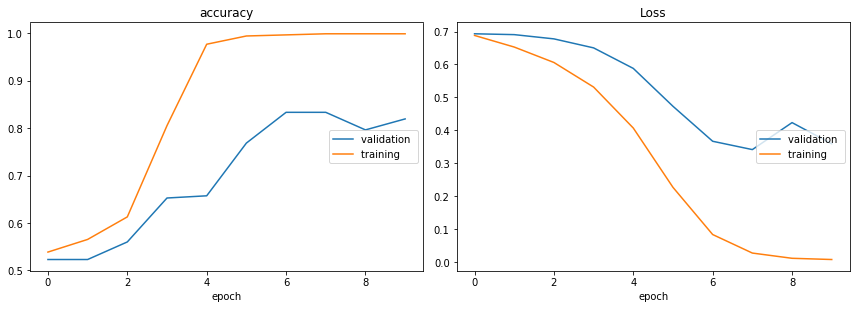

accuracy
	validation       	 (min:    0.523, max:    0.833, cur:    0.819)
	training         	 (min:    0.539, max:    0.999, cur:    0.999)
Loss
	validation       	 (min:    0.341, max:    0.693, cur:    0.359)
	training         	 (min:    0.007, max:    0.688, cur:    0.007)


In [18]:
# Fit the model
news_model.fit(padded_docs, newsgroups.target, 
               validation_split=0.2, callbacks=[PlotLossesKeras()], batch_size=64, epochs=10, verbose=False)

##### 5. Evaluate your model

Generate the test data and evaluate the model.

In [ ]:
newsgroups_test = fetch_20newsgroups(subset='test', shuffle=True, categories=categories)

### Example

#### Siamese network for document similarity and Keras Functional API

##### Functional API

So far we only had to build models with sequential layer structure. Large part of the problems are solvable using only these models but there are some advanced architecture which has non-sequential layout, such case is model is with multiple inputs, multiple outputs, or layers with shared weights. With functional API we have more control over the network.

Let's reproduce the same model we used for the sentiment analysis.

In [19]:
from keras.layers import Input
from keras.models import Model

from keras.utils import plot_model

In [22]:
visible = Input(shape=(max_length,))
embedding = Embedding(vocab_size, 8)(visible)
flatten = Flatten()(embedding)
output = Dense(1, activation='sigmoid')(flatten)

model = Model(inputs=visible, outputs=output)
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 144)               0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 144, 8)            40000     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1153      
Total params: 41,153
Trainable params: 41,153
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(padded_docs, newsgroups.target, epochs=50, verbose=0)
model.evaluate(padded_docs, newsgroups.target, verbose=0)

C:\Users\szige\Anaconda3\envs\ceu_dl\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[0.001922448352691342, 1.0]

#### Siamese network

Siamese network is a special structure which has two inputs that is processed separately by two identical subnetworks (these subnetworks are even sharing the same weights) and then merged together to produce a desired input. Such network is able to compare two documents.

In our case, we want to produce a similarity score between the two documents so in our merging layer we produce the cosine distance between the vectors produced by the shared embedded networks.

In [24]:
from keras.layers import Dot

##### 1. Create the shared layers without inputs

In [25]:
embedding = Embedding(vocab_size, 8)
flatten = Flatten()
hidden = Dense(6)

##### 2. Generate the two shared subnetworks using separate inputs

In [26]:
# first document
first = Input(shape=(max_length,))
first_embedding = embedding(first)
first_flatten = flatten(first_embedding)
first_hidden = hidden(first_flatten)

# second document
second = Input(shape=(max_length,))
second_embedding = embedding(second)
second_flatten = flatten(second_embedding)
second_hidden = hidden(second_flatten)

##### 3. Merge the layers by computing the cosine distance between them

In [27]:
output = Dot(axes=1, normalize=True)([first_hidden, second_hidden])

##### 4. Compile model

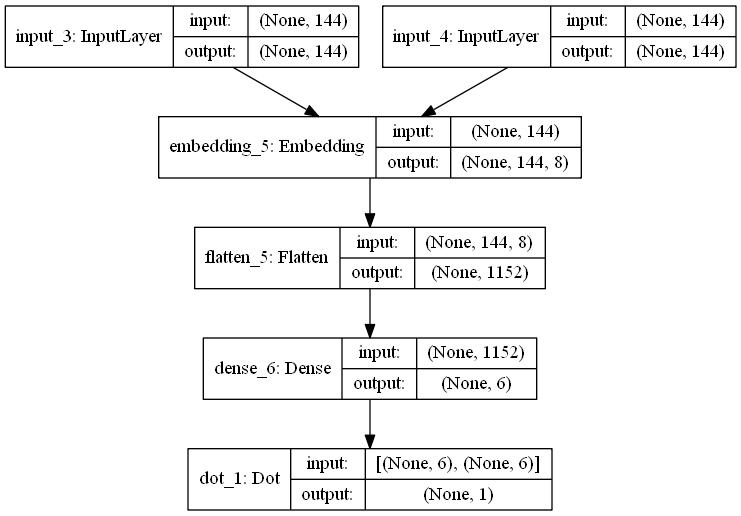

In [28]:
siamese = Model(inputs=[first, second], outputs=output)
siamese.compile(optimizer='adam', loss='mse', metrics=['mse'])

plot_model(siamese, show_shapes=True, show_layer_names=True)

In [29]:
siamese.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 144)          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 144)          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 144, 8)       40000       input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
flatten_5 (Flatten)             (None, 1152)         0           embedding_5[0][0]          

##### 5. Generate training data from reusing one-hot encoded padded sentiment documents

In [30]:
padded_docs, labels

(array([[4305, 3392, 3339, ..., 3362,  472, 4341],
        [1360, 3674, 1302, ...,  133,  832, 3026],
        [1069, 4212, 2053, ...,  189, 2694, 1721],
        ...,
        [3018, 4969, 1688, ...,    0,    0,    0],
        [1027, 2866,  528, ..., 4381, 4417,  196],
        [3226, 4240, 4637, ..., 4696, 4619,  196]]),
 array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0]))

We can see that we have 10 documents, 5 with positive and 5 with negative sentiment value. We could easily generate every combination (2 x 25 cases for the matching cases and 2 x 25 cases for the opposite cases for both direction) but let's assume for a second that we have much more sample data. In this case we'd like to generate training samples randomly. For that purpose we select random cases for every possible scenario and generate the samples that way. Let's generate the same amount of cases as we would by generating every possible combination:

| first  | second | outcome |
|--------|--------|---------|
| 25 pos | 25 pos |    1    |
| 25 pos | 25 neg |   -1    |
| 25 neg | 25 pos |   -1    |
| 25 neg | 25 neg |    1    |

In [31]:
def generate_indices(sentiment, size=50):
    start = 0 + 5 * (sentiment == 'negative')
    end = 5 + 5 * (sentiment == 'negative')
    return np.random.randint(start, end, size=size)

In [32]:
# first input: 50 positive, 50 negative
first_docs = padded_docs[np.concatenate((generate_indices('positive'), 
                                         generate_indices('negative')))]

# second input: 25 positive, 25 negative, 25 positive, 25 negative
second_docs = padded_docs[np.concatenate((generate_indices('positive', 25), 
                                          generate_indices('negative', 25),
                                          generate_indices('positive', 25), 
                                          generate_indices('negative', 25)))]

# labels: 50 positive, 100 negative, 50 positive
document_distances = np.vstack((np.ones((25, 1)), np.ones((50, 1)) * -1, np.ones((25, 1))))

In [33]:
first_docs.shape

(100, 144)

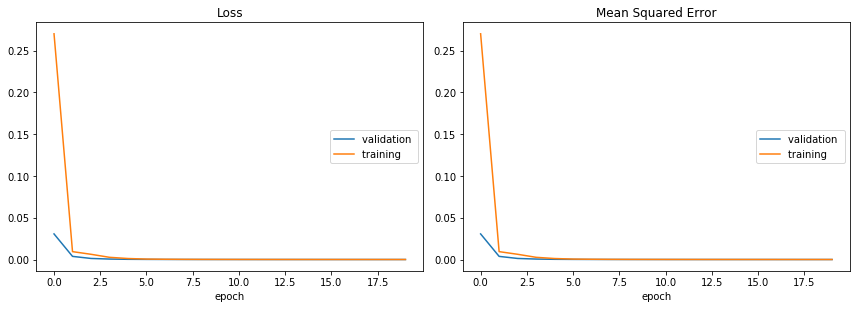

Loss
	validation       	 (min:    0.000, max:    0.693, cur:    0.000)
	training         	 (min:    0.000, max:    0.688, cur:    0.000)
Mean Squared Error
	validation       	 (min:    0.000, max:    0.031, cur:    0.000)
	training         	 (min:    0.000, max:    0.270, cur:    0.000)


In [34]:
siamese.fit([first_docs, second_docs], document_distances, 
            batch_size=10, epochs=20, validation_split=0.1, 
            callbacks=[PlotLossesKeras()])

Finally, let's try out our prediction:

In [35]:
for index in np.random.randint(1, len(first_docs), size=20):
    doc_pair = [first_docs[index-1:index], 
                second_docs[index-1:index]]
    expected = document_distances[index-1][0]
    predicted = siamese.predict(doc_pair).flatten()[0]
    print(f'expected distance: {expected:.2f} predicted: {predicted:.2f}')

expected distance: 1.00 predicted: 1.00
expected distance: 1.00 predicted: 0.99
expected distance: 1.00 predicted: 1.00
expected distance: -1.00 predicted: -0.99
expected distance: 1.00 predicted: 0.99
expected distance: 1.00 predicted: 0.99
expected distance: 1.00 predicted: 0.99
expected distance: -1.00 predicted: -1.00
expected distance: -1.00 predicted: -0.99
expected distance: -1.00 predicted: -1.00
expected distance: -1.00 predicted: -0.99
expected distance: 1.00 predicted: 0.99
expected distance: -1.00 predicted: -0.99
expected distance: -1.00 predicted: -0.99
expected distance: -1.00 predicted: -1.00
expected distance: 1.00 predicted: 1.00
expected distance: 1.00 predicted: 1.00
expected distance: -1.00 predicted: -1.00
expected distance: -1.00 predicted: -1.00
expected distance: 1.00 predicted: 1.00


### Example

#### Newsgroups document similarity

Let's try to build a similar network for the 20 newsgroups. This time let's use all of the topics and generate the pairs using the following rules:
If two documents are from
- two opposite group: their similarity is -1.0
- the same specific group: they are similar, their expected similarity is 1
- the same subgroup: their similarity is 0.5
- the same general group: their similarity is 0.1
- any other case: 0.0

| main group |   subgroup  | group                    | opposite groups                                |
|------------|-------------|--------------------------|------------------------------------------------|
|    comp    | graphics    | comp.graphics            |                                                |
|    comp    | os          | comp.os.ms-windows.misc  |                                                |
|    comp    | sys         | comp.sys.ibm.pc.hardware |                                                |
|    comp    | sys         | comp.sys.mac.hardware    |                                                |
|    comp    | windows     | comp.windows.x	          |                                                |
|    rec     |             | rec.autos	              |                                                |
|    rec     |             | rec.motorcycles	      |                                                |
|    rec     | sport       | rec.sport.baseball	      |                                                |
|    rec     | sport       | rec.sport.hockey	      |                                                |
|    sci     |             | sci.crypt	              |                                                |
|    sci     |             | sci.electronics	      |                                                |
|    sci     |             | sci.med	              |                                                |
|    sci     |             | sci.space	              |                                                |
|    misc    |             | misc.forsale             |                                                |
|    talk    | politics    | talk.politics.misc       |                                                |
|    talk    | politics    | talk.politics.guns	      |                                                |
|    talk    | politics    | talk.politics.mideast    |                                                |
|    talk    | religion    | talk.religion.misc       | alt.atheism                                    |
|    alt     |             | alt.atheism	          | soc.religion.christian, <br>talk.religion.misc |
|    soc     | religion    | soc.religion.christian   | alt.atheism                                    |

In [ ]:
vocab_size = 5000
max_length = 144
embedding_size = 50

In [ ]:
categories = ['alt.atheism', 'soc.religion.christian',              # opposites
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',  # same subgroup
              'rec.autos', 'rec.motorcycles']                       # same group
             
newsgroups = fetch_20newsgroups(subset='train', shuffle=True, categories=categories)

In [ ]:
opposites = {'alt.atheism': ['soc.religion.christian', 'talk.religion.misc'],
             'soc.religion.christian': ['alt.atheism'],
             'talk.religion.misc': ['alt.atheism']}

In [ ]:
def get_taxonomy(group_id, target_names):
    group = target_names[group_id]
    if group.count('.') == 1:
        main, _ = group.split('.')
        return main, None, group
    
    main, sub, *_ = group.split('.')
    return main, sub, group


def get_score(index_1, index_2, target_names, opposites):
    # handle same group
    if index_1 == index_2:
        return True
    
    main_1, sub_1, group_1 = get_taxonomy(index_1, target_names)
    main_2, sub_2, group_2 = get_taxonomy(index_2, target_names)
    
    # handle opposites
    opposite = opposites.get(group_1, [])
    if group_2 in opposite:
        return -1.0
    
    # handle same main / subgroups
    if main_1 == main_2:
        # same subgroup
        if sub_1 is not None and sub_2 is not None and sub_1 == sub_2:
            return 0.5
        # same main group
        return 0.1
    
    # unrelated
    return 0.0

In [ ]:
get_taxonomy('soc.religion.christian', newsgroups.target_names)

In [ ]:
print('same score: ', get_score('comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', newsgroups.target_names, opposites))
print('same sub score: ', get_score('comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', newsgroups.target_names, opposites))
print('same main score: ', get_score('rec.autos', 'rec.motorcycles', newsgroups.target_names, opposites))
print('orthogonal score: ', get_score('rec.autos', 'comp.sys.mac.hardware', newsgroups.target_names, opposites))
print('opposites score: ', get_score('alt.atheism', 'soc.religion.christian', newsgroups.target_names, opposites))

Let's generate 3000 training samples

In [ ]:
from collections import Counter
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(newsgroups.data)

In [ ]:
sample_size = 3000
vocab_size = len(tokenizer.word_index) + 1  # all recognized words + 1 for missing word

In [ ]:
encoded_docs = tokenizer.texts_to_sequences(newsgroups.data)
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
labels = newsgroups.target

In [ ]:
def generate_sample(docs, labels, target_names, opposites, sample_size=5000):
    f = np.random.randint(0, len(labels), size=sample_size)
    s = np.random.randint(0, len(labels), size=sample_size)
    similarity = np.array([get_score(labels[fi], labels[si], target_names, opposites) 
                           for fi, si in zip(f, s)])

    return docs[f], docs[s], similarity

In [ ]:
fX, sX, y = generate_sample(padded_docs, labels, 
                            newsgroups.target_names, opposites, 
                            sample_size)

Counter(y)

In [ ]:
def generate_model(input_layer, network):
    model = input_layer
    for layer in network:
        model = layer(model)
    return model

#### Pre-trained models

Let's use a pre-trained embedding model: Google pre-trained google news embedding. It is available to download from [here](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit). 
Using pre-trained networks have the advantage to add external knowledge to the network, potentially speeding up training.  
The imported layer can be used with "frozen" weights, so the training wont effect the layer or you can adjust the initial weights.

In [38]:
import gensim

filename = './data/googlenews/GoogleNews-vectors-negative300.bin.gz'
w2v = gensim.models.KeyedVectors.load_word2vec_format(filename, binary=True)

FileNotFoundError: [Errno 2] No such file or directory: './data/googlenews/GoogleNews-vectors-negative300.bin.gz'

In [ ]:
embedding = w2v.get_keras_embedding(train_embeddings=False)
conv_1 = Conv1D(50, 5, activation='relu')
pool_1 = MaxPooling1D(5)
conv_2 = Conv1D(10, 3, activation='relu')
pool_2 = MaxPooling1D(3)
flatten = Flatten()
hidden = Dense(20, activation='tanh')

common = [embedding, conv_1, pool_1, conv_2, pool_2, flatten, hidden]

In [ ]:
first_input = Input(shape=(max_length,))
first_hidden = generate_model(first_input, common)

second_input = Input(shape=(max_length,))
second_hidden = generate_model(second_input, common)

output = Dot(axes=1, normalize=True)([first_hidden, second_hidden])

In [ ]:
news_siamese = Model(inputs=[first_input, second_input], outputs=output)
news_siamese.compile(optimizer='adam', loss='mse', metrics=['mse'])

plot_model(news_siamese, show_shapes=True, show_layer_names=True)

In [ ]:
news_siamese.fit([fX, sX], y, 
                 batch_size=64, epochs=10, shuffle=True,
                 validation_split=0.1, verbose=1,
                 callbacks=[PlotLossesKeras()])

Validate by trying out some examples

In [ ]:
np.round(news_siamese.predict([fX[:10], sX[:10]]), 1), y[:10]

### Good job!

In the next chapter we'll examine how can we deal with data where the sequence of the data also carries important information by using recurrent neural networks in [DL 08 Recurrent Neural Networks](./DL_08_Recurrent_Networks.ipynb).